In [2]:
import zipfile
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as snb

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
parent_path = '/content/drive/My Drive/AIML/facial_keypoints_detection/'
data_path = os.path.join(parent_path,'data')
train_path = os.path.join(data_path,'training/training.csv')
test_path = os.path.join(data_path,'test/test.csv')
lookup_table_path = os.path.join(data_path,'IdLookupTable.csv')

In [22]:
def unzip_folder(folder_name):
  path = os.path.join(data_path, folder_name)
  zip_ref = zipfile.ZipFile(path,'r')
  path = os.path.join(data_path, f"{folder_name.split('.')[0]}")
  zip_ref.extractall(path)
  zip_ref.close()


In [23]:
# unzip_folder('test.zip')
# unzip_folder('training.zip')

In [27]:
# Read train data
train_data = pd.read_csv(train_path)

In [8]:
train_data.head().T

,0,1,2,3,4
left_eye_center_x,66.033564,64.332936,65.057053,65.225739,66.725301
left_eye_center_y,39.002274,34.970077,34.909642,37.261774,39.621261
right_eye_center_x,30.227008,29.949277,30.903789,32.023096,32.24481
right_eye_center_y,36.421678,33.448715,34.909642,37.261774,38.042032
left_eye_inner_corner_x,59.582075,58.85617,59.412,60.003339,58.56589
left_eye_inner_corner_y,39.647423,35.274349,36.320968,39.127179,39.621261
left_eye_outer_corner_x,73.130346,70.722723,70.984421,72.314713,72.515926
left_eye_outer_corner_y,39.969997,36.187166,36.320968,38.380967,39.884466
right_eye_inner_corner_x,36.356571,36.034723,37.678105,37.618643,36.98238
right_eye_inner_corner_y,37.389402,34.361532,36.320968,38.754115,39.094852


In [9]:
# let's check missing vlues
train_data.isna().any().value_counts()

True     28
False     3
dtype: int64

In [10]:
# Fill missing values with previous value
train_data.fillna('ffill',inplace=True)

In [11]:
train_data.isna().any().value_counts()

False    31
dtype: int64

In [12]:
def get_image(data):
  img_list = []
  for idx in range(len(data)):
    img = list(map(lambda x: 0 if '' == x else int(x),data['Image'].iloc[idx].split(' ')))
    img_list.append(img)
  images = np.array(img_list,dtype = 'float').reshape(-1,96,96,1) 
  return images

train_images = get_image(train_data)

In [13]:
train_images.shape

(7049, 96, 96, 1)

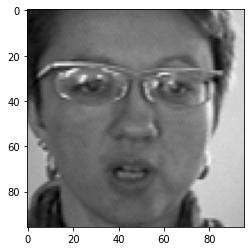

In [14]:
plt.imshow(train_images[10].reshape(96,96),cmap='gray')

In [15]:
y_train = train_data.drop(columns=['Image'])
y_train.shape

(7049, 30)

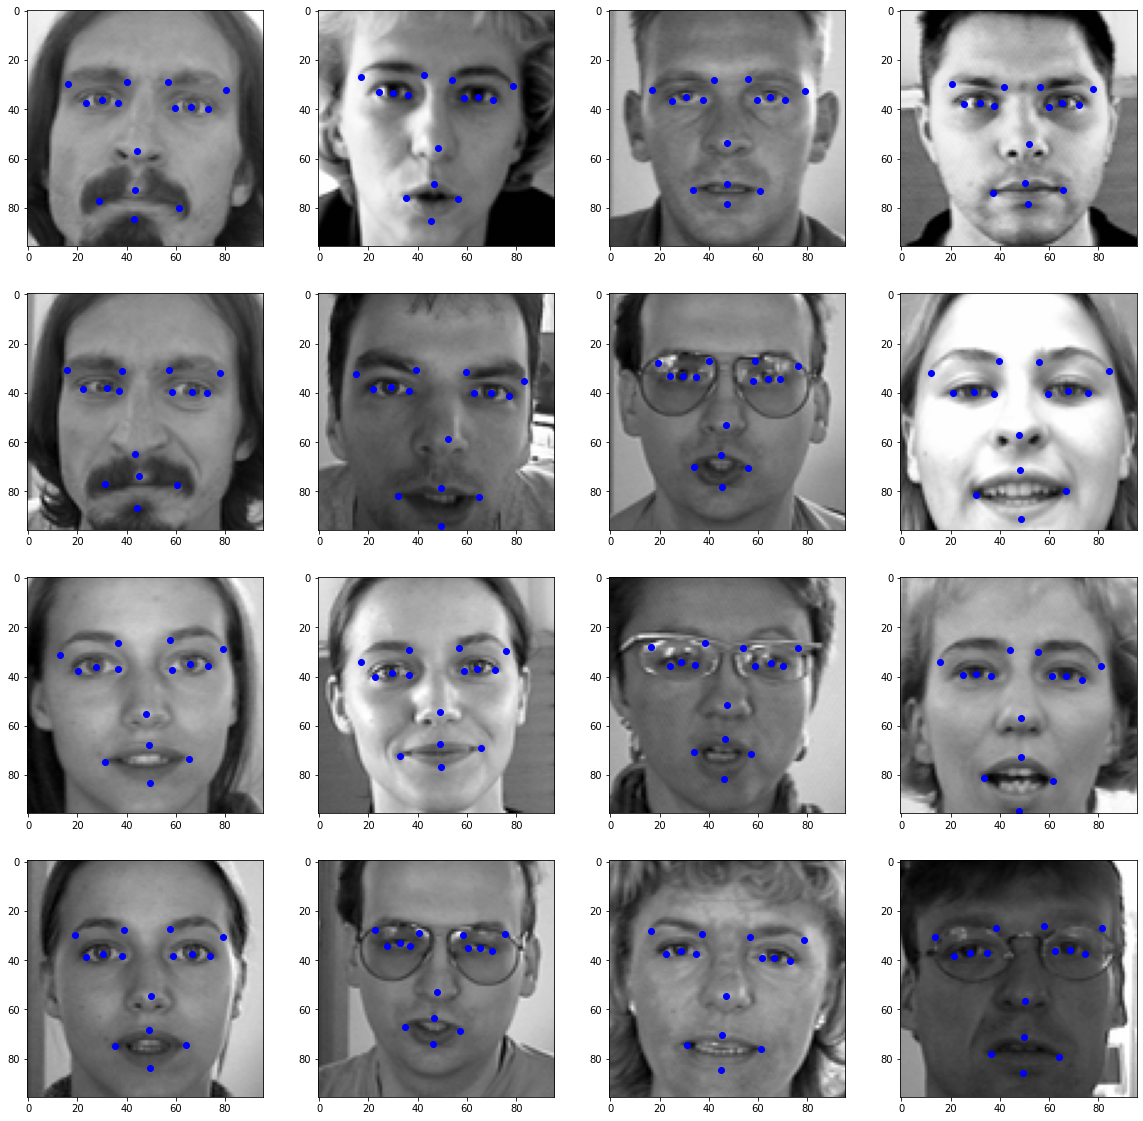

In [16]:
n = 16
cols = 4
height = max(20, int(n/cols))
plt.figure(figsize=(20, height))
for idx in range(n):
  plt.subplot(int(n/cols),cols,idx+1)
  plt.imshow(train_images[idx].reshape(96,96),cmap='gray')
  for kid in range(0,30,2):
    plt.plot(train_data.loc[idx][kid],train_data.loc[idx][kid+1],'bo')